In [24]:
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [22]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

postop
   0  1  2  3  4  5  6  7  8
0  2  1  0  2  0  1  1  3  0
1  2  0  0  0  0  1  1  2  2
2  0  1  0  0  0  1  0  2  0
3  2  1  1  0  0  2  0  3  0
4  2  2  0  0  0  1  1  2  0
ID3 :  0.5555555555555556
KNN :  0.3888888888888889
Normalized confusion matrix
[[0.75 0.   0.25]
 [1.   0.   0.  ]
 [0.6  0.2  0.2 ]]


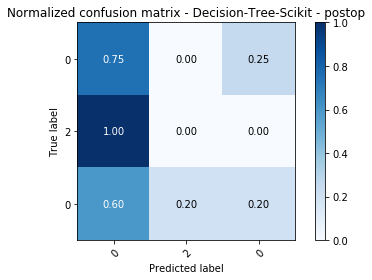

Normalized confusion matrix
[[0.58333333 0.         0.41666667]
 [0.         0.         1.        ]
 [0.8        0.2        0.        ]]


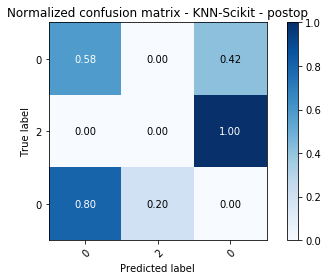

cmc
    0  1  2   3  4  5  6  7  8  9
0  24  2  3   3  1  1  2  3  0  1
1  45  1  3  10  1  1  3  4  0  1
2  43  2  3   7  1  1  3  4  0  1
3  42  3  2   9  1  1  3  3  0  1
4  36  3  3   8  1  1  3  2  0  1
ID3 :  0.45084745762711864
KNN :  0.44745762711864406
Normalized confusion matrix
[[0.57723577 0.13821138 0.28455285]
 [0.27941176 0.32352941 0.39705882]
 [0.375      0.24038462 0.38461538]]


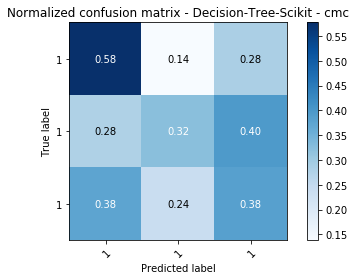

Normalized confusion matrix
[[0.56910569 0.13821138 0.29268293]
 [0.30882353 0.32352941 0.36764706]
 [0.32692308 0.28846154 0.38461538]]


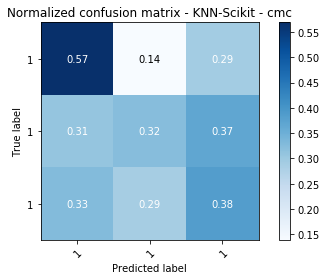

adult
   0   1       2   3   4   5   6   7   8   9     10  11  12  13  14
0  39   7   77516   9  13   4   1   1   4   1  2174   0  40  39   0
1  50   6   83311   9  13   2   4   0   4   1     0   0  13  39   0
2  38   4  215646  11   9   0   6   1   4   1     0   0  40  39   0
3  53   4  234721   1   7   2   6   0   2   1     0   0  40  39   0
4  28   4  338409   9  13   2  10   5   2   0     0   0  40   5   0
ID3 :  0.6928321356182052
KNN :  0.6315336895768073
Normalized confusion matrix
[[0.81718346 0.18281654]
 [0.70233513 0.29766487]]


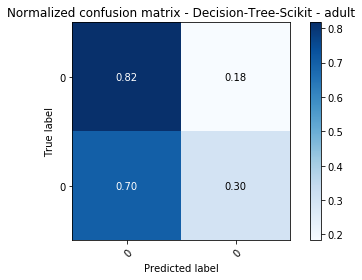

Normalized confusion matrix
[[0.75226098 0.24773902]
 [0.75211701 0.24788299]]


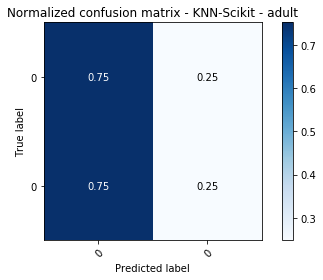

In [41]:
datasets = {
    "postop" : pd.read_csv("post-operative.data", header=None),
    "cmc" : pd.read_csv("cmc.data", header=None),
    "adult" : pd.read_csv("adult.data", header=None)
}

for key in datasets:
    
    dataset = datasets[key]
    

    # Ignore whitespace in obs
    for col in dataset.columns:
        if dataset[col].dtype == type(object):
            le = preprocessing.LabelEncoder()
            dataset[col] = dataset[col].str.strip()  
            dataset[col] = le.fit_transform(dataset[col])
    
    print(key)
    print(dataset.head())
    
    if(key == "adult"):
        train = datasets["adult"]
        test = pd.read_csv("adult.test", header=None)
        for col in test.columns:
            if test[col].dtype == type(object):
                le = preprocessing.LabelEncoder()
                test[col] = dataset[col].astype(str).str.strip()  
                test[col] = le.fit_transform(test[col])
    else:
        train, test = train_test_split(dataset, test_size=0.2)
    
    train_X, train_y = train.values[:,:-1], train.values[:,-1]
    test_X, test_y = test.values[:, :-1], test.values[:,-1]
    
    clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf = clf.fit(train_X, train_y)
    
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(train_X, train_y)
    
    score = clf.score(test_X, test_y)
    print("ID3 : ", score)
    
    knnScore = knn.score(test_X, test_y)
    print("KNN : ", knnScore)
    
    id3Pred = clf.predict(test_X)
    knnPred = knn.predict(test_X)
    
    plot_confusion_matrix(test_y, id3Pred, classes=test_y, normalize=True,
                      title='Normalized confusion matrix - Decision-Tree-Scikit - {}'.format(key))
    plt.show()
    
    plot_confusion_matrix(test_y, knnPred, classes=test_y, normalize=True,
                      title='Normalized confusion matrix - KNN-Scikit - {}'.format(key))
    plt.show()